In [152]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [153]:
df = pd.read_csv(r"E:\Excel\Financial Sample.csv")
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",1/1/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.0,$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",1/1/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",6/1/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",6/1/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",6/1/2014,6,June,2014


In [154]:
# List of columns that contain $ signs
dollar_cols = ['Manufacturing Price', 'Sale Price', 'COGS', 'Profit']
# Clean dollar-formatted columns and convert to float
for col in dollar_cols:
    # Step 1: Convert everything to string
    X[col] = X[col].astype(str)
    
    # Step 2: Remove dollar signs and commas
    X[col] = X[col].str.replace('$', '', regex=False)
    X[col] = X[col].str.replace(',', '', regex=False)
    
    # Step 3: Remove leading/trailing spaces
    X[col] = X[col].str.strip()
    
    # Step 4: Convert to float, setting bad values as NaN
    X[col] = pd.to_numeric(X[col], errors='coerce')


In [155]:
X.head()

,Units Sold,Manufacturing Price,Sale Price,COGS,Profit
0,1618.5,3.0,20.0,16185.0,16185.0
1,1321.0,3.0,20.0,13210.0,13210.0
2,2178.0,3.0,15.0,21780.0,10890.0
3,888.0,3.0,15.0,8880.0,4440.0
4,2470.0,3.0,15.0,24700.0,12350.0


In [156]:
x_col = 'Units Sold'
y_col = 'Profit'

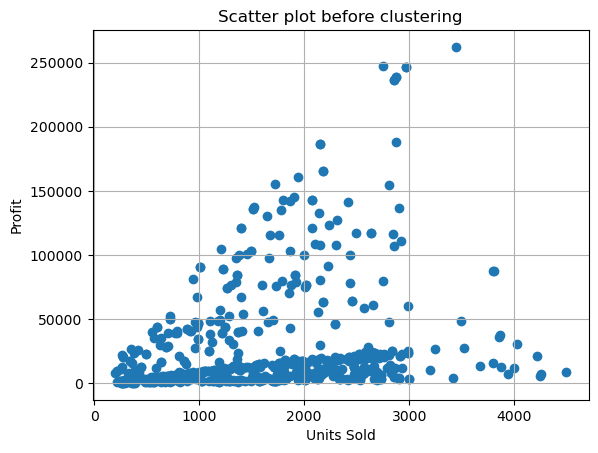

In [157]:
plt.scatter(X[x_col], X[y_col])
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title('Scatter plot before clustering')
plt.grid(True)
plt.show()

In [158]:
x_col = 'Sale Price'
y_col = 'COGS'

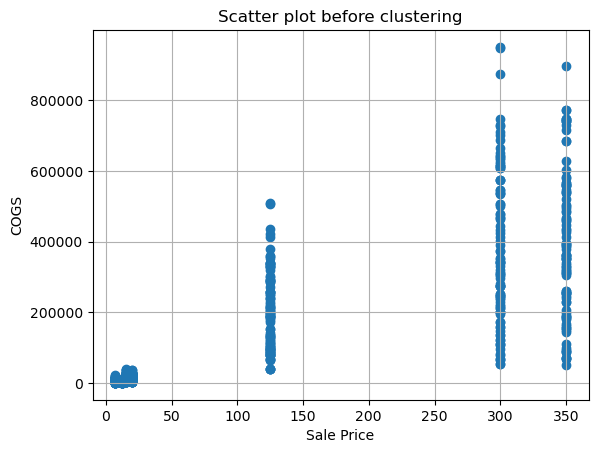

In [159]:
plt.scatter(X[x_col], X[y_col])
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title('Scatter plot before clustering')
plt.grid(True)
plt.show()

In [160]:
x_col = 'Profit'
y_col = 'Manufacturing Price'

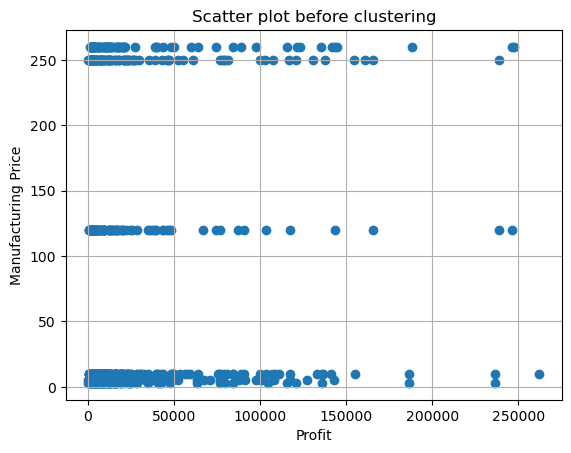

In [161]:
plt.scatter(X[x_col], X[y_col])
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.title('Scatter plot before clustering')
plt.grid(True)
plt.show()

In [162]:
X.isna().sum()

Units Sold              0
Manufacturing Price     0
Sale Price              0
COGS                    0
Profit                 63
dtype: int64

In [163]:
X_clean = X.dropna()

In [164]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_clean[['Units Sold', 'Profit']])

I used StandardScaler because my features like Units Sold and Profit are on very different scales and might have outliers.

StandardScaler makes sure each feature has the same average and spread, so one feature doesn’t dominate the distance calculation in K-Means.

MinMaxScaler just squishes values between 0 and 1, but it doesn’t fix differences in variance or outliers as well.

Since K-Means depends on distance, I chose StandardScaler to give every feature a fair impact.

E:\Anaconda Installer\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
E:\Anaconda Installer\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
E:\Anaconda Installer\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
E:\Anaconda Installer\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

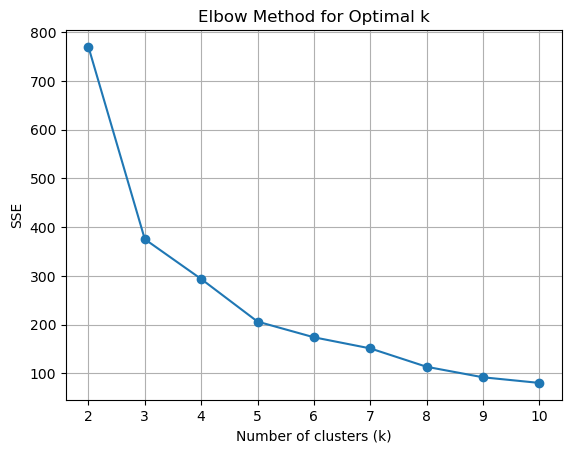

In [165]:
# Elbow Method
sse = []
k_rng = range(2, 11)

for k in k_rng:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(scaled_data)
    sse.append(km.inertia_)

# Plot the elbow curve
plt.plot(k_rng, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [166]:
kmeans = KMeans(n_clusters=3, random_state=0)
X_clean['Cluster'] = kmeans.fit_predict(scaled_data)


E:\Anaconda Installer\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\User\AppData\Local\Temp\ipykernel_13480\1690502810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_clean['Cluster'] = kmeans.fit_predict(scaled_data)


In [191]:
X_clean['Cluster'] = kmeans.labels_
X_clean.head()

C:\Users\User\AppData\Local\Temp\ipykernel_13480\2718858210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_clean['Cluster'] = kmeans.labels_


,Units Sold,Manufacturing Price,Sale Price,COGS,Profit,Cluster
0,1618.5,3.0,20.0,16185.0,16185.0,0
1,1321.0,3.0,20.0,13210.0,13210.0,0
2,2178.0,3.0,15.0,21780.0,10890.0,2
3,888.0,3.0,15.0,8880.0,4440.0,0
4,2470.0,3.0,15.0,24700.0,12350.0,2


In [167]:
# Get centroids (in scaled form)
centroids_scaled = kmeans.cluster_centers_

# Convert centroids back to original values
centroids_original = scaler.inverse_transform(centroids_scaled)

# Show them
print("Cluster Centers (Original Scale):")
for i, center in enumerate(centroids_original):
    print(f"Cluster {i}: Units Sold = {center[0]:.2f}, Profit = {center[1]:.2f}")


Cluster Centers (Original Scale):
Cluster 0: Units Sold = 908.18, Profit = 12657.96
Cluster 1: Units Sold = 2082.22, Profit = 125336.60
Cluster 2: Units Sold = 2391.84, Profit = 15227.71


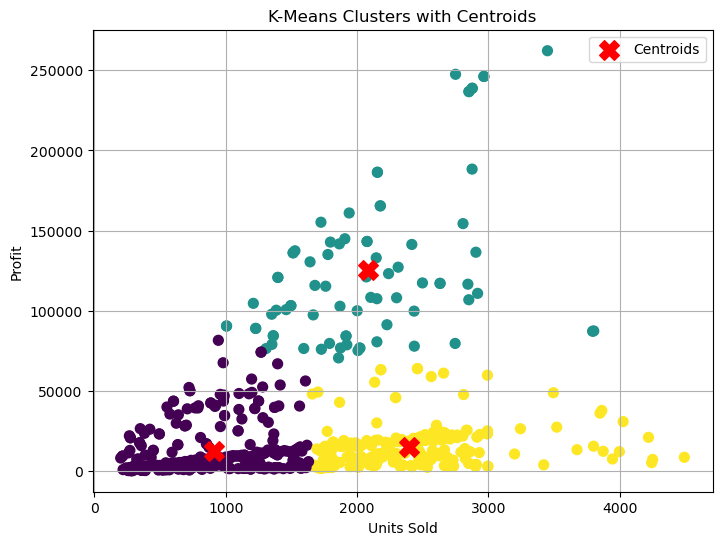

In [193]:
# Plot clusters with different colors
plt.figure(figsize=(8, 6))
plt.scatter(X_clean['Units Sold'], X_clean['Profit'], 
            c=X_clean['Cluster'], cmap='viridis', s=50)

# Plot the centroids
plt.scatter(centroids_original[:, 0], centroids_original[:, 1],
            c='red', marker='X', s=200, label='Centroids')

# Labels and title
plt.xlabel('Units Sold')
plt.ylabel('Profit')
plt.title('K-Means Clusters with Centroids')
plt.legend()
plt.grid(True)
plt.show()

In [170]:
# See What Each Cluster Looks Like (Summary Table)
print(X_clean.groupby('Cluster')[['Units Sold', 'Profit']].mean())

          Units Sold         Profit
Cluster                            
0         905.863077   12684.138923
1        2082.218750  125336.596875
2        2388.685345   15179.959655


### Interpretation of K-Means Clustering Results

After applying K-Means clustering to the dataset using the features `Units Sold` and `Profit`, the algorithm divided the data into three distinct clusters. The number of clusters (k=3) was chosen using the elbow method, and the silhouette score of 0.517 indicates a moderately strong separation between the groups.

By analyzing the clusters and their centroids, the following patterns were observed:

**Cluster 0**  
- Low units sold  
- Low profit  
- These products are underperforming and may require marketing support, pricing adjustments, or even discontinuation if not viable.

**Cluster 1**  
- High units sold  
- High profit  
- These are strong-performing products. They are likely in high demand and should be prioritized for marketing, inventory, and scaling efforts.

**Cluster 2**  
- Moderate units sold  
- Moderate profit  
- These products are steady performers. With the right support, they could become high performers over time.

In summary, K-Means helped to segment the dataset into meaningful groups. This makes it easier to understand product performance and develop targeted business strategies based on sales and profitability patterns.


In [197]:
import pickle

# Save model to a file
with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)


In [ ]:
# Load the model from file
with open('kmeans_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Predict with the loaded model
predicted = loaded_model.predict(scaled_data)
